# 引入函數和中文

In [87]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.core.frame import DataFrame
import matplotlib as mpl
mpl.rc('font', family='Noto Sans Mono CJK TC')

# 讀取房屋資料

In [88]:
df_house=pd.read_csv('house.csv')
df_house.columns=['鄉鎮市區','交易標的','土地區段位置或建物區門牌','土地移轉總面積平方公尺','都市土地使用分區','非都市土地使用分區','非都市土地使用編定','交易年月','交易筆棟數','移轉層次','總樓層數','建物型態','主要用途','主要建材','建築完成年月','建物移轉總面積平方公尺','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','建物現況格局-隔間','有無管理組織','總價元','單價每平方公尺','車位類別','車位移轉總面積平方公尺','車位總價元','備註','編號']
df_house.head()

,鄉鎮市區,交易標的,土地區段位置或建物區門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月,交易筆棟數,移轉層次,...,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價每平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號
0,板橋區,房地(土地+建物)+車位,新北市板橋區光復街31~60號,23.04,住,NaN,NaN,1071117,土地1建物1車位1,七層,...,2,有,有,19000000,114217.0,坡道平面,36.35,0,含增建或未登記建物。,RPSNMLNKKHOFFAF97CA
1,板橋區,房地(土地+建物),新北市板橋區民生路三段241~270號,7.83,住,NaN,NaN,1071214,土地2建物1車位0,十六層,...,2,有,有,14250000,103501.0,NaN,0.00,0,含增建或未登記建物。,RPTNMLNKKHOFFAF08CA
2,土城區,土地,瑞興段451~480地號,713.59,其他,NaN,NaN,1080114,土地1建物0車位0,NaN,...,0,有,無,82100000,115052.0,NaN,0.00,0,包含公共設施保留地之交易。;,RPOPMLNKKHOFFAF77CA
3,土城區,房地(土地+建物),新北市土城區學府路一段121~150號,5.75,住,NaN,NaN,1071224,土地1建物1車位0,十七層,...,0,無,有,3800000,120750.0,NaN,0.00,0,NaN,RPUOMLLKKHOFFAF08CA
4,土城區,房地(土地+建物),新北市土城區南天母路121~150號,29.22,NaN,山坡地保育區,丙種建築用地,1080111,土地1建物1車位0,通道，九層，十層,...,2,有,有,5100000,44240.0,NaN,0.00,0,NaN,RPQNMLMKKHOFFAF67CA


## 選取需要的數值
## 查看有多少區域及有無nan

In [89]:
df=df_house.loc[:,['鄉鎮市區','單價每平方公尺']]
area=df.groupby('鄉鎮市區').count().isnull().reset_index()
area

,鄉鎮市區,單價每平方公尺
0,三峽區,False
1,三芝區,False
2,三重區,False
3,中和區,False
4,五股區,False
5,八里區,False
6,土城區,False
7,坪林區,False
8,平溪區,False
9,新店區,False


## 統整每個區域並計算平均價格

In [90]:
r=['三峽區','三芝區','三重區','中和區','五股區','八里區','土城區','坪林區','平溪區','新店區','新莊區','板橋區','林口區','樹林區','永和區','汐止區','泰山區','淡水區','深坑區','瑞芳區','石門區','蘆洲區','貢寮區','金山區','鶯歌區','雙溪區','萬里區']

regin=[]
for i in range(len(r)):
    a = df[(df['鄉鎮市區']==r[i])]
    regin.append(a)
    
mean_price=[]
for i in range(len(r)):
    b=(regin[i]['單價每平方公尺'].mean())*3.24/10000
    mean_price.append(b)

## 將地區與平均價格重新製作成表格形式並且由價錢高低排列

In [91]:
rd=DataFrame(r)
md=DataFrame(mean_price)

rp=pd.concat([rd,md],axis=1)
rp.columns=['地區','平均價格:萬元/坪']
rp=rp.sort_values(by=['平均價格:萬元/坪'],ascending=True)
rp.index=range(len(rp))
rp

,地區,平均價格:萬元/坪
0,平溪區,0.144828
1,貢寮區,0.184518
2,坪林區,0.255960
3,雙溪區,0.318330
4,石門區,0.894888
5,萬里區,3.456497
6,三芝區,5.020299
7,金山區,6.644484
8,瑞芳區,9.630738
9,鶯歌區,16.189318


Text(0.5,1,'新北市平均房價')

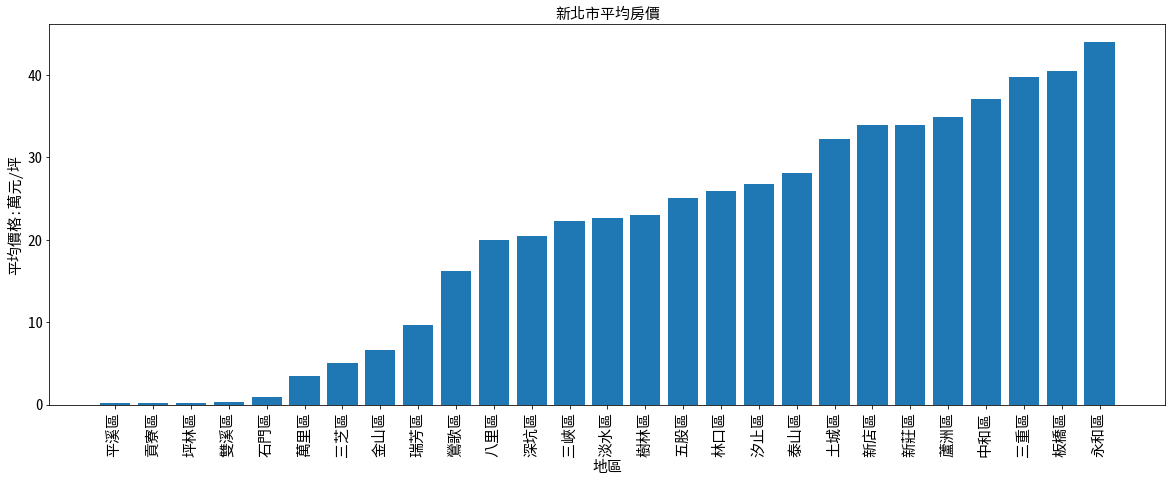

In [92]:
plt.figure(figsize=(20,7))
plt.bar(rp['地區'],rp['平均價格:萬元/坪'])
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('地區',fontsize=15)
plt.ylabel('平均價格:萬元/坪',fontsize=15)
plt.title('新北市平均房價',fontsize=15)

## 取出平均地價最貴兩個區域來分析

In [93]:
yh=df_house[(df_house['鄉鎮市區']=='永和區')]
yh=yh.loc[:,['鄉鎮市區','交易年月','有無管理組織','單價每平方公尺']]

In [94]:
yhm=yh.groupby('有無管理組織').count()
yhm

,鄉鎮市區,交易年月,單價每平方公尺
有無管理組織,,,
有,30,30,29
無,43,43,43


#### 永和區有無管理組織比例

(-1.125300292532926,
 1.1012047758349013,
 -1.1635794146002088,
 1.1250804756428554)

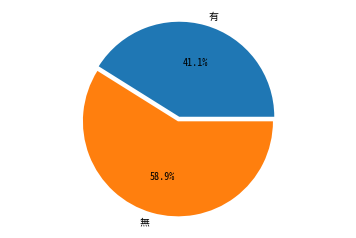

In [95]:
labels='有','無'
size=[30,43]
separated = (0,.05)
plt.pie(size,labels=labels,autopct='%1.1f%%',explode=separated)
plt.axis('equal')

In [96]:
bj=df_house[(df_house['鄉鎮市區']=='板橋區')]
bj=bj.loc[:,['鄉鎮市區','有無管理組織','單價每平方公尺']]
bjm=bj.groupby('有無管理組織').count()
bjm

,鄉鎮市區,單價每平方公尺
有無管理組織,,
有,282,272
無,62,62


#### 永和區有無管理組織比例

(-1.1077042687051368,
 1.144573048121413,
 -1.1061791105492034,
 1.1038768154314296)

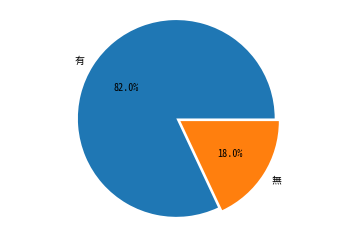

In [97]:
labels='有','無'
size=[282,62]
separated = (0,.05)
plt.pie(size,labels=labels,autopct='%1.1f%%',explode=separated)
plt.axis('equal')

#### 可以看出房價部分跟平均價錢沒有什麼關係